# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
pd.read_csv("lab12_files/US_Baby_Names_right.csv")

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names=pd.read_csv("lab12_files/US_Baby_Names_right.csv")
print(baby_names.dtypes)
print(type(baby_names))
print(len(baby_names))


Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names.drop(["Unnamed: 0","Id"],inplace=True,axis=1)

In [6]:
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
baby_names.Gender.value_counts()

Gender
F    558846
M    457549
Name: count, dtype: int64

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [13]:
df2=baby_names.groupby('Name')['Count'].sum().sort_values(ascending=False)
df_F=baby_names.where(baby_names['Gender']=='F').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
df_M=baby_names.where(baby_names['Gender']=='M').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
df2.head(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

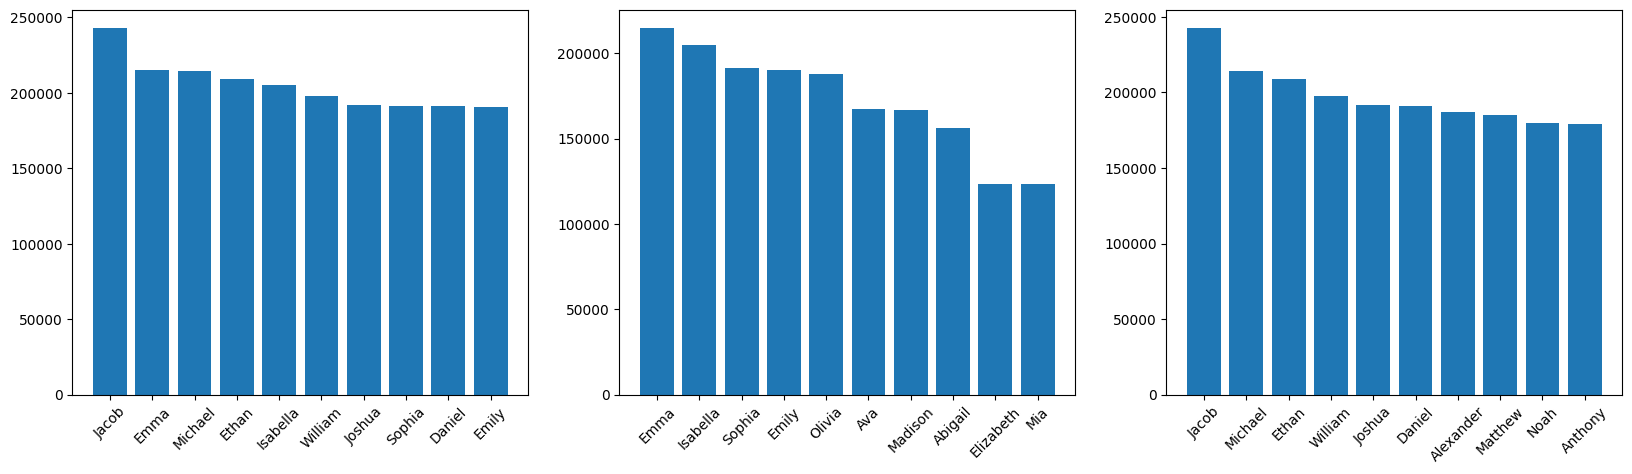

In [10]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
axes[0].bar(df2.index,df2.values)
axes[1].bar(df_F.index,df_F.values)
axes[2].bar(df_M.index,df_M.values)

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
baby_names['Name'].nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [41]:
rng = np.random.default_rng()
#probs=baby_names['Name'].value_counts()/baby_names['Name'].count()
#rng_indexes=baby_names['Name'].value_counts().index.to_numpy()
#rng_indexes[rng.multinomial(1,probs).argmax()]

probs=(df2/df2.sum())
rng_indexes=df2.index.to_numpy()
rng_indexes[rng.multinomial(1,probs).argmax()]


'Dylan'

In [29]:
df2

Name
Jacob         242874
Emma          214852
Michael       214405
Ethan         209277
Isabella      204798
               ...  
Eniola             5
Atlantis           5
Marci              5
Simarpreet         5
Nita               5
Name: Count, Length: 17632, dtype: int64

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [27]:
print(df2.head(1))
print(df2.mean())
print(df2.median())
print(df2.std())


Name
Jacob    242874
Name: Count, dtype: int64
2008.932168784029
49.0
11006.069467890571


In [28]:
df2

Name
Jacob         242874
Emma          214852
Michael       214405
Ethan         209277
Isabella      204798
               ...  
Eniola             5
Atlantis           5
Marci              5
Simarpreet         5
Nita               5
Name: Count, Length: 17632, dtype: int64

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.